# Q

- 이 질문은 데이터셋을 이해하고 새로운 가치를 창출해 내는 능력을 측정하기 위한 자유 질문이다.
- 코드는 필요 없고, 정답도 없다. 자유롭게 원하는 내용을 구체적으로 서술해야 한다. 
- 사례를 분석함에 있어 필요한 인프라, 혹은 데이터를 참조할 수 있다.

# 들어가며: 

#### 주어진 배경지식이 적어 나름 여러가지 추론을 통해 데이터를 이해하려 노력했고, 그에 따라 분석을 진행했습니다. 

또한 분석의 대상은 미국에서 생산하는 사과로 한정했습니다. 그 이유는   
1. 각기 다른 독립적인 분석을 하는 것이 데이터셋의 이해에 필요할 것인가?에 대한 의구심과  
1. 상대적으로 데이터가 많은 것을 집중적으로 분석하는 것이 좋다고 생각했고, 
1. 무엇보다 우리나라 또한 미국에 사과를 수출하고 있으니 미국 사과는 어떠한 특성을 가지고 있고 어디서 소비되고 있는지 궁금했습니다.

## 가정한 것들에 대해

- 단위는 나타나 있지 않으므로, 기본적인 단위는 1톤 정도로 생각하자.
- 마늘의 종류를 볼 때 난지형과 한지형은 국내에서 생산되는 마늘의 품종을 크게 나눌 떄 사용하는 것.  
    - 따라서  Country column은 수입처가 아니라 공급처이며, 이 데이터는 공급처와 납품처의 사이에서 트릿지를 통해 유통이 이루어지는 물량을 의미하는 것이라고 판단할 수 있다. 

- (1) 트릿지는 일단 철저하게 중간단계의 역할에 머물러 있는 상태이며, 직접적인 유통 역할을 맡지 아니한 상태라고 생각하자.
- (2) 아직 구제적으로 공급처와 물량을 어떻게 확보하는지에 대해 판단할 수 없다. 
    - 계약에 따라 물량을 확보한다고 알고있지만, 이것이 단순히 현지의 직원들이 남아있는 물량을 찾는 것인지, 아니면 판매자가 주체적으로 잉여물량을 트릿지를 통해 팔고자 시도하는 것인지 알 수 없기 때문이다. 두 종류 모두 해당하는 것이라 생각할 수도 있다.( 3번째가 현재의 주된 생각이다.)
    - fulfillment solution에서 판매자 리스트를 제공하고 있다는 것을 알 수 있지만, 구매자가 요구하는 종류와 수량을 이 리스트 내에서 모두 다 소화할 수 있는지는 알 수 없기 때문이다. 
- (3) 따라서 유통판매 데이터라는 큰 가정 하에, 디테일한 측면에서도 최대한 다양한 해석을 해야한다.

# 가설 1. 미국에서 수출하는 사과는 동일분기에 비슷한 유통량을 나타낼 것이다.

- 모든 농작물은 파종시기와 수확시기가 정해져있고, 이에 따라 시장에 풀리는 물량이 다르다. 당연히 제철음식이 많이 팔리고, 미국 외로 수출되는 양도 많을 것이다. 따라서 유통량에 따라 언제가 제철인지 알 수 있을 것이다. 

In [45]:
X=dr.groupby(['closing_year','closing_quarter']).agg(['sum'])
X

/tmp/ipykernel_4661/3981162904.py:1: FutureWarning: ['time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X=dr.groupby(['closing_year','closing_quarter']).agg(['sum'])


total_sum
                                   sum
closing_year closing_quarter          
2018         1                 1641.73
             2                 1482.33
             3                 2386.17
             4                 1978.40
2019         1                 1695.68
             2                 1597.44
             3                 1953.65
             4                 1773.51
2020         1                 2066.41
             2                 2058.80
             3                 2855.93
             4                 1199.44

- 1분기: 1641 -> 1695 -> 2066  = 7097
- 2분기: 1482 -> 1597 -> 2058  = 5137
- 3분기: 2386 -> 1953 -> 2855  = 7194
- 4분기: 1978 -> 1773 -> 1199  = 4950
    - 혹시나 해서 분기별 유통을 암산해 보아도 결과는 다를 바가 없다. 

<AxesSubplot:xlabel='closing_year,closing_quarter'>

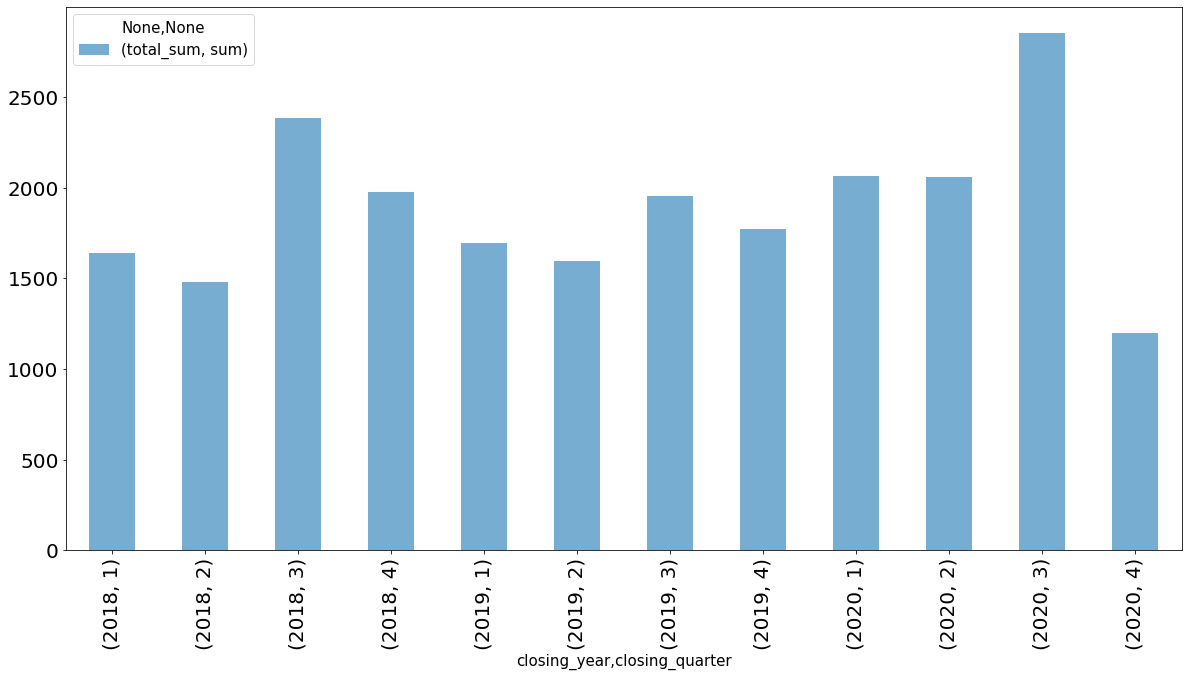

In [46]:
X.plot(kind='bar',figsize=(20,10),fontsize=20,alpha=0.6) 

- 규칙성을 찾아볼 수 없다. 따라서 가설 1은 폐기한다.

#### 그렇다면, 파는 사람이 있어야 사는 사람도 있는 법일까? 아니면 그 반대일까?

- 가설 1의 나이브한 생각에서 나타나는 문제점은, 현 데이터는 고전경제학에서 배웠던 공급-수요 곡선, 혹은 케인지언들의 AD-AS 곡선의 Equilibrium과 그에 따른 가격결정을 보여주고 있는 것이 아니며, 해외로 수출되는 양을 나타내는 것이라는 것을 간과한 것에 있다. 
    - 그렇다면, 간과한 것은 무역이라는 경제적 현상에 개입하는 다양한 요소들이 있을 수 있다는 것이 아닌가?

- 가장 먼저, 미국 내에서의 총 생산량이 얼마인지 파악해야 한다. 

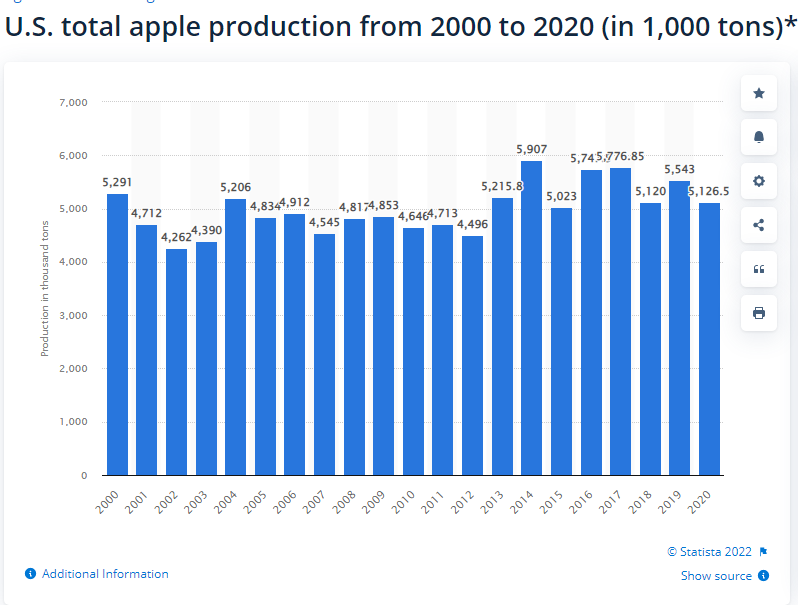  
출처: https://www.statista.com/statistics/193274/us-total-apple-production-since-2000/

생산량 vs. 유통량  
18년도: 5120 vs 7488      
19년도: 5543 vs 7020  (+400 vs -400)  
20년도: 5126 vs 8180  (-420 vs  +1100)  

확실히 1년 총생산량과 무관하게 움직이고 있는 유통량의 모습을 볼 수 있다. 오히려 반비례하는게 아닌가, 하는 생각까지 든다.  
그렇다면 무엇이 문제인가?  

다시 한번, 트릿지라는 회사의 특징을 생각해보자. 처음 정했던 가정에 기초해 생각해본다면, 이 회사에서 유통되는 물건들의 특징은 '누군가'가 원해서 사거나, 파는 것이고, '다른 누군가'가 팔거나, 사야하는, 양 측간의 'needs'가 결합되어 거래가 만들어지는 것이다.  
그렇다면, 트릿지가 제공하는 서비스를 통해 만들어지는 거래가 증가했다, 라는 것은 무엇을 의미하는가? 

1. 결국에는 '원래' 세계시장의 어딘가에서 소화될 것이라고 예상한 물량이 소화가 안되었다.  
2. 재고자산으로써 남아있을 때 실시간으로 감가상각이 이루어지는 사과 특성상 제 값을 받고 후일을 도모하기 위해서는 최대한 이 물량을 처리해야 할 필요가 있었다.  
3. 판매자의 요청에 따라 리스트에 해당 물건이 올라가고 바이어가 이 물건에 대한 거래를 요청한 경우, 당연히 판매자의 주체성에 따라 거래가 이루어진 것이며,  
4. 구매를 원하는 자의 요청에 따라 물건이 모색되는 경우, 미국 내에서 소화를 미처 다 못시킨 사과 물량이 시장 내에서 유통되고 있음을 현지 직원들의 판단에 따라, 혹은 각종 데이터의 수집에 따라 알 수 있었을 것이며, 이에 트릿지 내에서 미국산 사과의 거래량이 증가했을 것이다.
5. 즉, 누군가가 먼저 거래를 원했는지와 무관하게, 해당 상황과 같은 일들이 일어났을 때 트릿지에 의한 미국산 사과 유통량은 증가했을 것이라 판단할 수 있다.

그렇다면 이런 일들은 왜 일어나느 것인가,  
먼저, 미국 내에서 소화하는 자국산 사과의 양이 예측 가능할 정도로 균일하다고 가정했을 때, 이러한 변동성은 국외의 영향이 다수 미친 것이라고 판단할 수 있다.  

그렇다면, 수출에 가장 악영향을 미치는 것은 무엇인가? 아마 관세일 것이다. 관세에 대해 찾아보자. 

# 가설 2. 관세가 증가함에 따라 트릿지의 서비스를 통한 사과 판매량이 증가할 것이다.

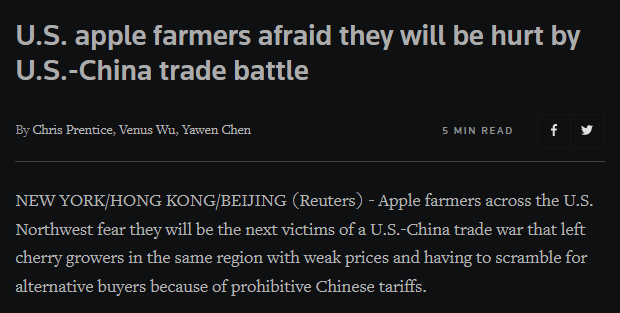  
출처: https://www.reuters.com/article/us-usa-trade-apples-idUSKCN1LK2B1

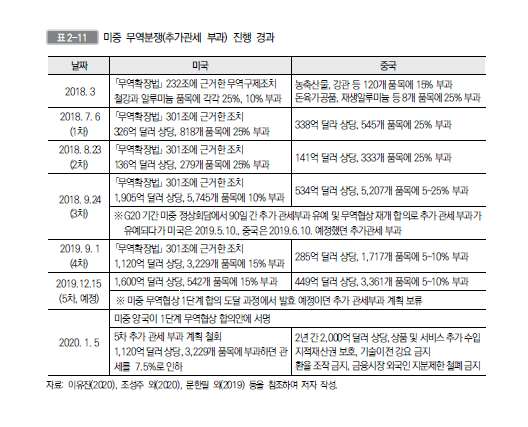  
출처: 전형진 외, 중국의 농식품 무역과 통상분쟁 연구, KIEP 대외경제정책연구원 20-08, p.74

In [62]:
X=dr.groupby(['closing_year','closing_quarter']).agg(['sum'])
X

/tmp/ipykernel_4661/3981162904.py:1: FutureWarning: ['time'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  X=dr.groupby(['closing_year','closing_quarter']).agg(['sum'])


total_sum
                                   sum
closing_year closing_quarter          
2018         1                 1641.73
             2                 1482.33
             3                 2386.17
             4                 1978.40
2019         1                 1695.68
             2                 1597.44
             3                 1953.65
             4                 1773.51
2020         1                 2066.41
             2                 2058.80
             3                 2855.93
             4                 1199.44

위 표에서 볼 수 있듯이, 18년도 3분기가 시작되는 7월에 1차 무역분쟁이 시작되며 중국 측에선 보복을 위해 미국산 농작물에 대해 25% 관세를 부과했다.   
이때의 정치적 갈등은 7월 초부터 9월 말까지 이어졌으며, 동 기간 동안 트릿지에서 처리한 물류량은 50% 증가하였다.  
  
그 뒤 4분기부터 관세가 다시 유예되었고, 이에 따라 거래량은 점차 감소했다. 하지만 2019년 6월 10일, 2분기 이후로 예정된 관세가 부과된 이후 트릿지에서의 거래물류량은 다시 증가하는 양상을 보이고 있다.  

관세 부과의 양상에 따라 분기별 거래량의 양상이 반비례하는 것을 보아, 이 둘은 어느정도 상관관계가 있는 것이라 판단할 수 있다.

또한 2020년의 거래량 증가는 코로나 19 팬대믹과 그로 인한 컨테이너 물량 부족 때문이라 추론할 수 있다. 수요의 증감과 무관히 공급 측에서 초유의 사태를 맞이함에 따라 기존의 거래를 정상적으로 이루어지지 못했고, 그 수요가 자연스럽게 대체재를 찾게 된 것이다.   

참고문헌: https://www.seattletimes.com/business/international-trade/in-pandemic-twist-washington-farm-exports-crimped-by-shortage-of-cargo-containers/

# 결론

- 18,19, 그리고 20년 3년 동안 이루어진 거래의 변화량과 그 원인을 추론했던 결과, 트릿지의 서비스가 국제 농산물 거래 시장에서 완충재 역할을 하고 있고, 그것이 어떤 역할인 것인지 개략적으로나마 알 수 있게 되었다고 생각합니다.